In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
import os

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir("../functions")
from preprocessing import target_encoder
from feature import Drop_features_files
from model import Model
from plot import labs
os.chdir("../notebooks")

In [4]:
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv('../data/preprocessed_data/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [6]:
#te = target_encoder()
#te.fit(data,None)
#data = te.transform(data)
#data = data.drop(['WINDOW', 'PATIENT_VISIT_IDENTIFIER'],axis=1)

In [7]:
le = LabelEncoder()
data.AGE_PERCENTIL = le.fit_transform(data.AGE_PERCENTIL)
data = data.drop(['WINDOW', 'PATIENT_VISIT_IDENTIFIER'],axis=1)

In [8]:
chi2_5 = 'chi2_alpha_0.05.txt'
chi2_2_5 = 'chi2_alpha_0.025.txt'
high_corr_95 = 'high_corr_thd_0.95.txt'
high_corr_90 = 'high_corr_thd_0.9.txt'
eq_mean_5 = 'equal_mean_alpha_0.05.txt'
eq_mean_2_5 = 'equal_mean_alpha_0.025.txt'

## DummyClassifier

## LogisticRegression

In [13]:
lr = Model(LogisticRegression(max_iter=1000), data)
lr.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(max_iter=1000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : None

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.743             |ROC AUC MÉDIA         : 0.860
ROC AUC DESVIO PADRÃO : 0.056             |ROC AUC DESVIO PADRÃO : 0.010
ROC AUC ITERVALO      : 0.743 ± 0.015     |ROC AUC ITERVALO      : 0.860 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.702             |ACCURACY  MÉDIA       : 0.7

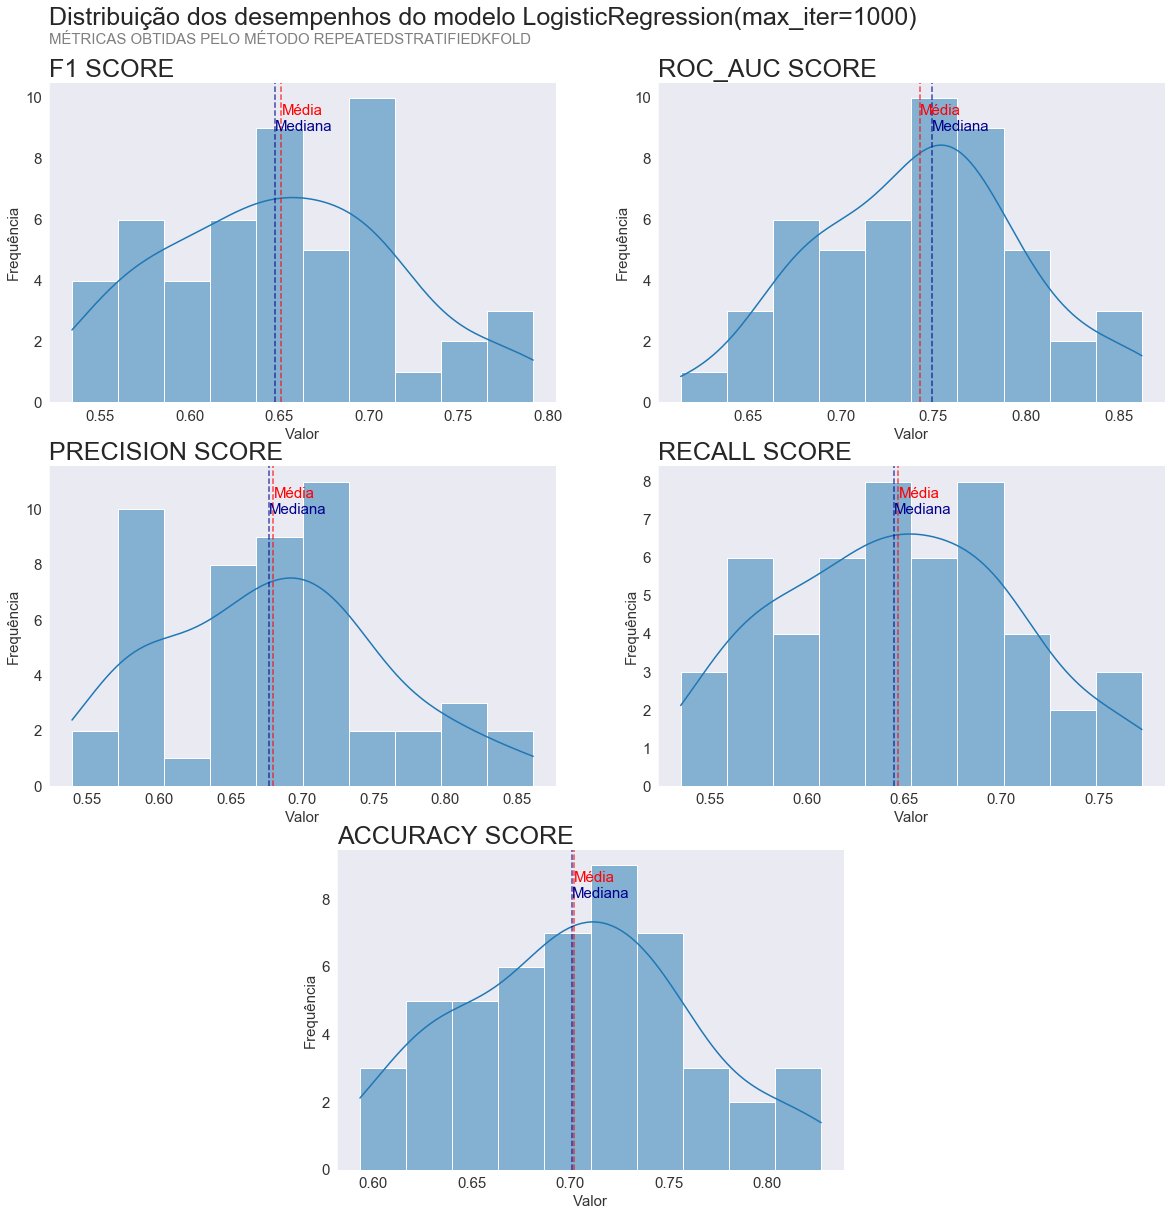

In [14]:
lr.hist_metrics(kde=True)

In [11]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'max_iter':[1000,10000,100000]}
lr.search(grid)

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(C=0.1, max_iter=1000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : None

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.762             |ROC AUC MÉDIA         : 0.823
ROC AUC DESVIO PADRÃO : 0.063             |ROC AUC DESVIO PADRÃO : 0.011
ROC AUC ITERVALO      : 0.762 ± 0.018     |ROC AUC ITERVALO      : 0.823 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.693             |ACCURACY  MÉDIA     

{'penalty': 'l2', 'max_iter': 1000, 'C': 0.1}

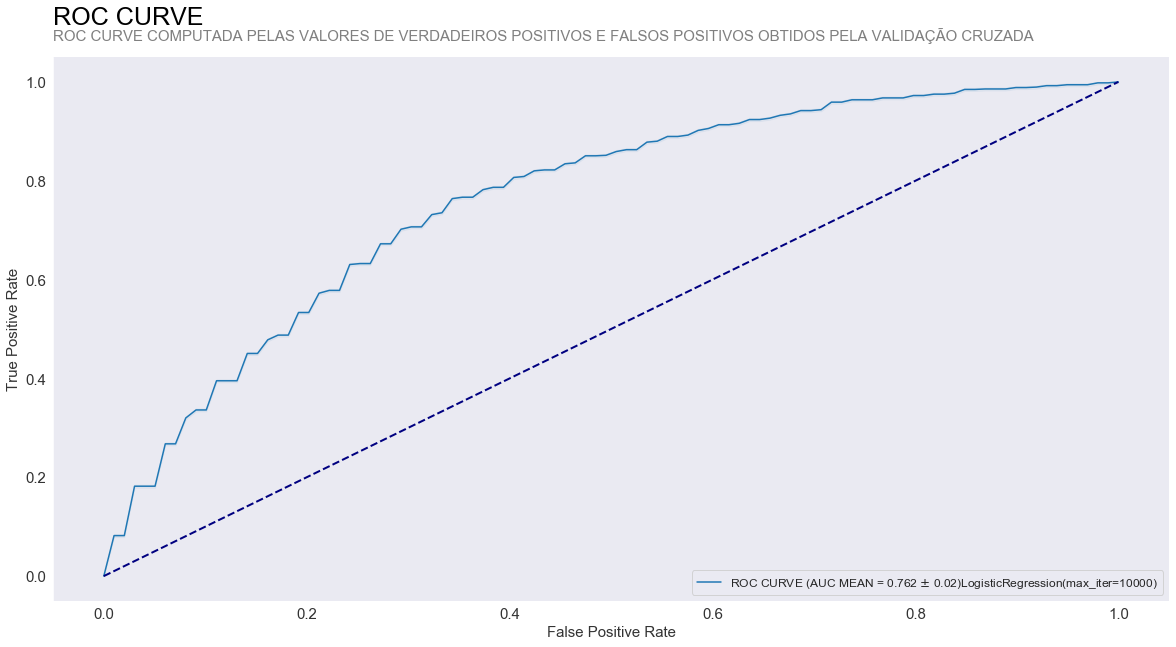

In [12]:
lr.plot_roc_curve()
plt.show()

In [13]:
lr2 = Model(LogisticRegression(max_iter=10000), data, [('feature_selection', 
                                                       Drop_features_files(files=[high_corr_95]))])
lr2.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(max_iter=10000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['high_corr_thd_0.95.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.752             |ROC AUC MÉDIA         : 0.844
ROC AUC DESVIO PADRÃO : 0.059             |ROC AUC DESVIO PADRÃO : 0.011
ROC AUC ITERVALO      : 0.752 ± 0.016     |ROC AUC ITERVALO      : 0.844 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA     

In [16]:
lr3 = Model(LogisticRegression(max_iter=10000), data, [('feature_selection', 
                                                       Drop_features_files(files=[chi2_5 ,high_corr_95]))])
lr3.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(max_iter=10000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['chi2_alpha_0.05.txt', 'high_corr_thd_0.95.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.756             |ROC AUC MÉDIA         : 0.837
ROC AUC DESVIO PADRÃO : 0.061             |ROC AUC DESVIO PADRÃO : 0.011
ROC AUC ITERVALO      : 0.756 ± 0.017     |ROC AUC ITERVALO      : 0.837 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|-------------------------------------

In [17]:
lr4 = Model(LogisticRegression(max_iter=10000), data, [('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_5, high_corr_95]))])
lr4.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(max_iter=10000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.05.txt',
                           'high_corr_thd_0.95.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.769             |ROC AUC MÉDIA         : 0.816
ROC AUC DESVIO PADRÃO : 0.062             |ROC AUC DESVIO PADRÃO : 0.012
ROC AUC ITERVALO      : 0.769 ± 0.017     |ROC AUC ITERVALO      : 0.816 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
-----------------------

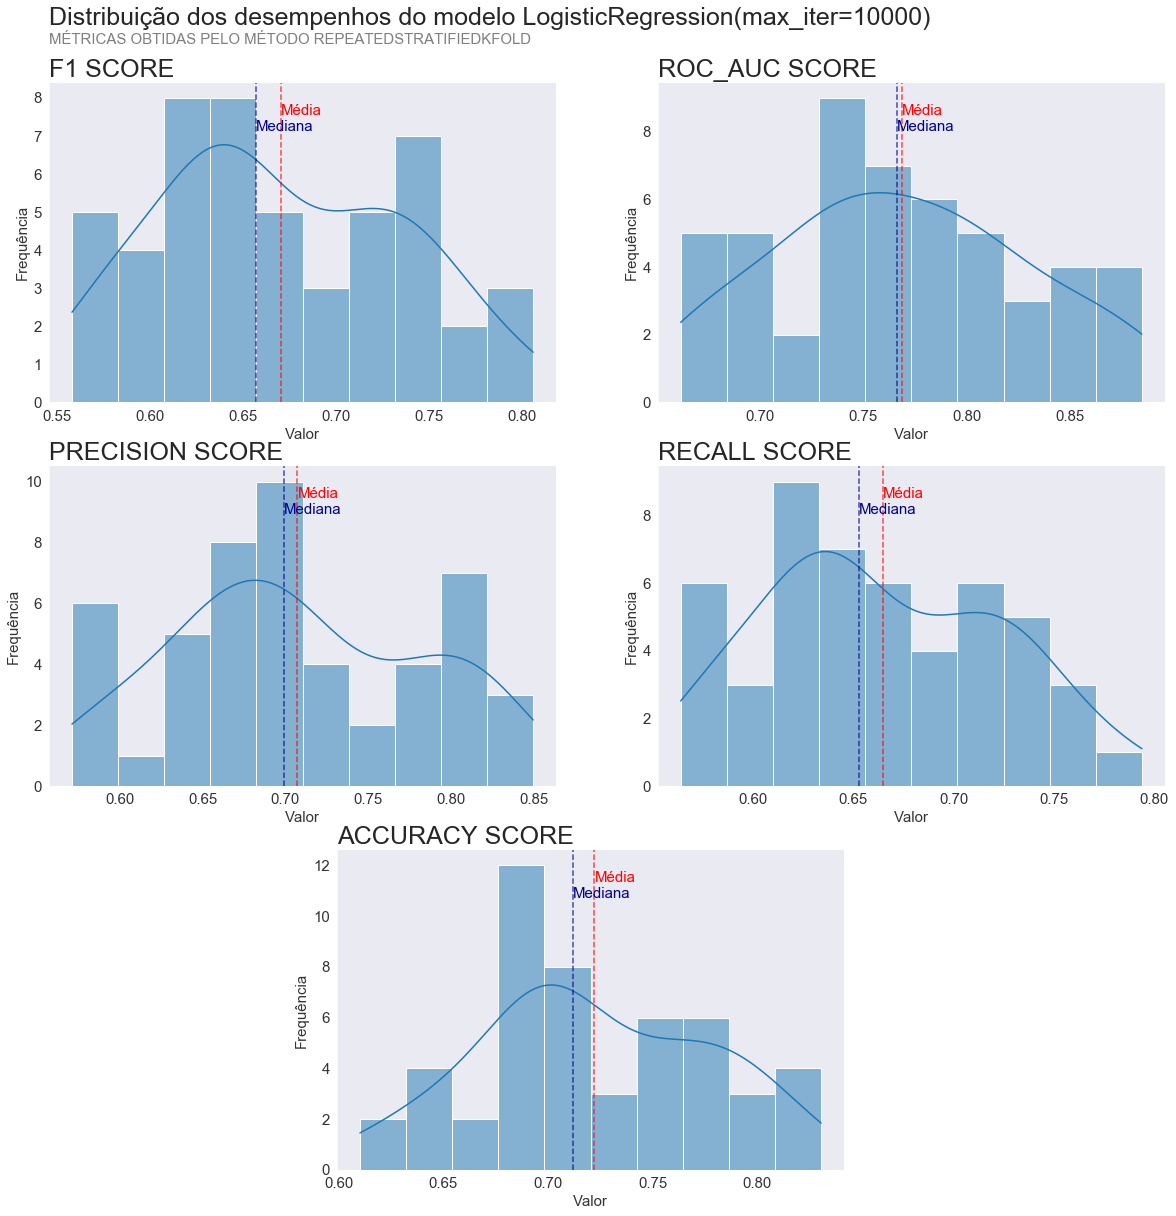

In [19]:
lr4.hist_metrics(kde=True)

In [22]:
lr4.search(grid)

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : LogisticRegression(max_iter=1000)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.05.txt',
                           'high_corr_thd_0.95.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.769             |ROC AUC MÉDIA         : 0.816
ROC AUC DESVIO PADRÃO : 0.062             |ROC AUC DESVIO PADRÃO : 0.012
ROC AUC ITERVALO      : 0.769 ± 0.017     |ROC AUC ITERVALO      : 0.816 ± 0.003
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------

{'penalty': 'l2', 'max_iter': 1000, 'C': 1.0}

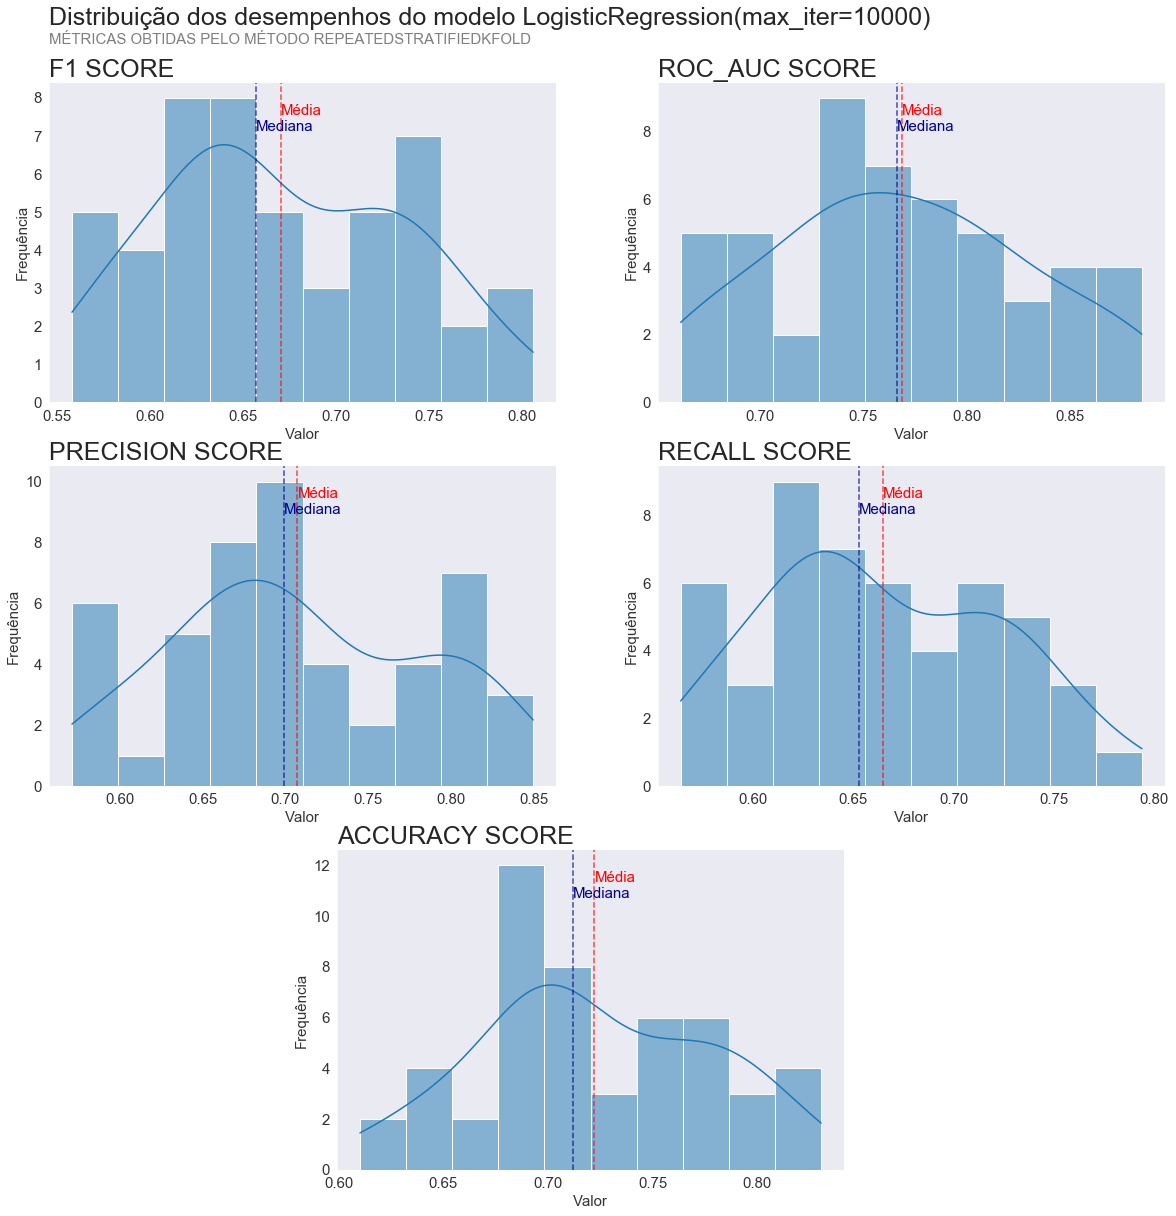

In [23]:
lr4.hist_metrics(kde=True)

# DecisionTreeClassifier

# RandomForestClassifier

In [ ]:
rf1 = Model(RandomForestClassifier(), data)
rf1.cross_val()

In [ ]:
rf2 = Model(RandomForestClassifier(), data,[('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_5, high_corr_95]))])
rf2.cross_val()

In [ ]:
rf3 = Model(RandomForestClassifier(), data,[('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_5, high_corr_95]))])
rf3.cross_val()

In [11]:
rf4 = Model(RandomForestClassifier(), data,[('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
rf4.cross_val()

Validação Cruzada com 10 repetições e 5 divisões do dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : RandomForestClassifier()
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.783             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.050             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.783 ± 0.01      |ROC AUC ITERVALO      : 1.000 ± 0.00
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
-----------------------------------

In [30]:
# Number of trees in random forest
n_estimators = list(range(200,2000,200))
# Maximum number of levels in tree
max_depth = [None, 2, 4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10, 12]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
              'n_jobs' : [-1]}

In [27]:
rf4 = Model(RandomForestClassifier(), data,[('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
rf4.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : RandomForestClassifier()
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.785             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.050             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.785 ± 0.014     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
---------------------------------

In [28]:
rf4.search(random_grid)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : RandomForestClassifier(max_depth=4, min_samples_leaf=8, n_estimators=1200,
                       n_jobs=-1)
MÉTODOS DE SELEÇÃO DE VARIÁVEIS : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.796             |ROC AUC MÉDIA         : 0.913
ROC AUC DESVIO PADRÃO : 0.060             |ROC AUC DESVIO PADRÃO : 0.007
ROC AUC ITERVALO      : 0.796 ± 0.017     |ROC AUC ITERVALO      : 0.913 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS M

{'n_jobs': -1,
 'n_estimators': 1200,
 'min_samples_leaf': 8,
 'max_depth': 4,
 'criterion': 'gini'}

In [ ]:
rf4.search(random_grid, score='f1')

  0%|          | 0/100 [00:00<?, ?it/s]

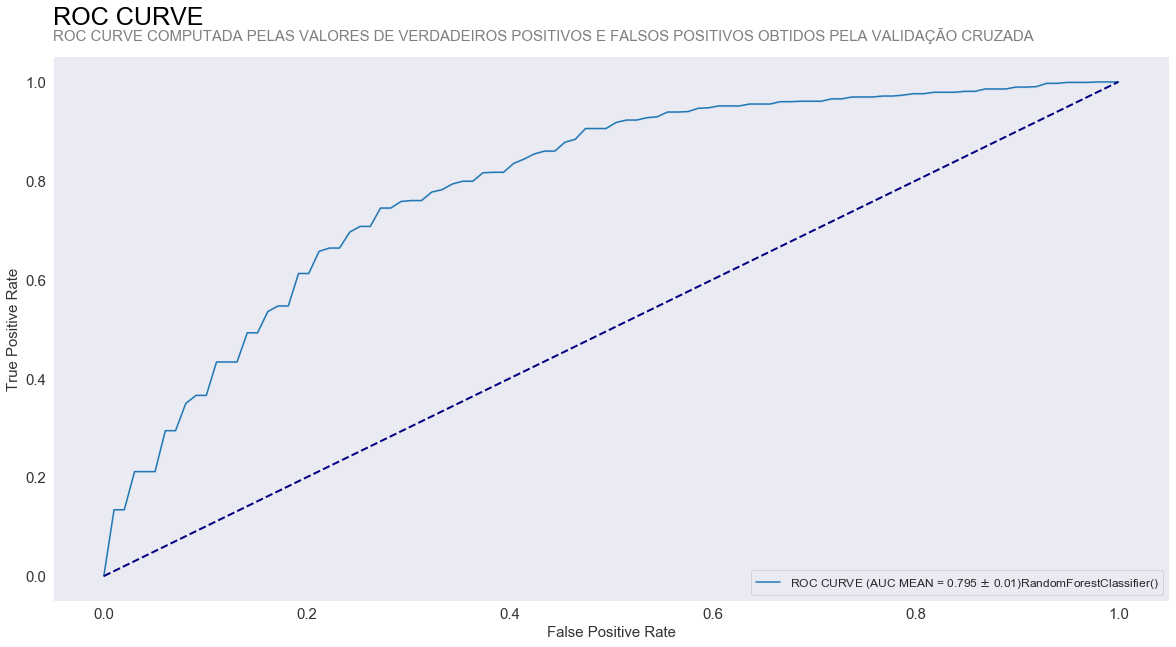

In [32]:
rf4.plot_roc_curve()
plt.show()

In [36]:
rf5 = Model(RandomForestClassifier(**rf4.best_params), data,[('feature_selection',
                                                       Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
rf5.cross_val()

Validação Cruzada com 10 repetições e 5 divisões do dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=900)
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.795             |ROC AUC MÉDIA         : 0.956
ROC AUC DESVIO PADRÃO : 0.049             |ROC AUC DESVIO PADRÃO : 0.005
ROC AUC ITERVALO      : 0.795 ± 0.01      |ROC AUC ITERVALO      : 0.956 ± 0.00
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DE

In [52]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [37]:
g_nb = Model(GaussianNB(), data,[('feature_selection',Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
g_nb.cross_val()

Validação Cruzada com 10 repetições e 5 divisões do dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : GaussianNB()
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.779             |ROC AUC MÉDIA         : 0.800
ROC AUC DESVIO PADRÃO : 0.059             |ROC AUC DESVIO PADRÃO : 0.013
ROC AUC ITERVALO      : 0.779 ± 0.02      |ROC AUC ITERVALO      : 0.800 ± 0.00
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|----

In [53]:
g_nb.search(params_NB)

  0%|          | 0/100 [00:00<?, ?it/s]

Validação Cruzada com 10 repetições e 5 divisões do dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : GaussianNB(var_smoothing=0.0004328761281083057)
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.792             |ROC AUC MÉDIA         : 0.815
ROC AUC DESVIO PADRÃO : 0.058             |ROC AUC DESVIO PADRÃO : 0.013
ROC AUC ITERVALO      : 0.792 ± 0.02      |ROC AUC ITERVALO      : 0.815 ± 0.00
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------

{'var_smoothing': 0.0004328761281083057}

In [55]:
stack = Model(StackingClassifier([('rf',RandomForestClassifier(**rf4.best_params)), ('log',LogisticRegression()), 
                                  ('gaussian', GaussianNB(**g_nb.best_params))]), data, 
              [('feature_selection',Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
stack.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_leaf=4,
                                                       n_estimators=900)),
                               ('log', LogisticRegression()),
                               ('gaussian',
                                GaussianNB(var_smoothing=0.0004328761281083057))])
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|------

In [50]:
stack = Model(StackingClassifier([('rf',RandomForestClassifier()), ('log',LogisticRegression()), ('gaussian', GaussianNB())]), data, 
              [('feature_selection',Drop_features_files(files=[chi2_2_5, eq_mean_2_5, high_corr_90]))])
stack.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                   : StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('log', LogisticRegression()),
                               ('gaussian', GaussianNB())])
Métodos de seleção de variávies : Drop_features_files(files=['chi2_alpha_0.025.txt', 'equal_mean_alpha_0.025.txt',
                           'high_corr_thd_0.9.txt'])

------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.792             |ROC AUC MÉDIA         : 0.979
ROC AUC DESVIO PADRÃO : 0.064             |ROC AUC DESVIO PADRÃO : 0.015
ROC AUC ITERVALO      : 0.792 ± 0.02      |ROC AUC ITERVALO      : 0.979 ± 0.0